# Machine Learning Models for Classifying Credit Card Fraud

The code for five classifier models that are used to forecast credit card fraud is contained in this notebook. The credit card fraud detection dataset from Kaggle was used, and it contains 284,807 credit card transactions done by cardholders in September 2013. 492 (0.172%) of the 284,807 transactions are fraudulent. There are 31 columns of numbers in the dataset. Time (the number of seconds between the dataset's first transaction and the current transaction), amount, and class (1 = fraudulent; 0 = not fraudulent) are three of the columns. V1, V2, and so on are assigned to the remaining columns. Data about each transaction was transformed using Principal Component Analysis (PCA) to create the variables in these columns. What the original data features are is unknown to us.

The models built with this notebook are:

1. Decision Tree
2. Gradient Boosting
3. Random Forest
4. Bagging Classifier
4. XGBoost

Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from pathlib import Path
from collections import Counter

from xgboost import XGBClassifier 

import matplotlib.pyplot as plt
%matplotlib inline
import pydotplus
from IPython.display import Image

In [3]:
df_fraud = pd.read_csv(('../data/creditcard.csv'))
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
X = df_fraud.copy()
X.drop('Class', axis=1, inplace=True)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [6]:
df_fraud.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df_fraud.shape

(284807, 31)

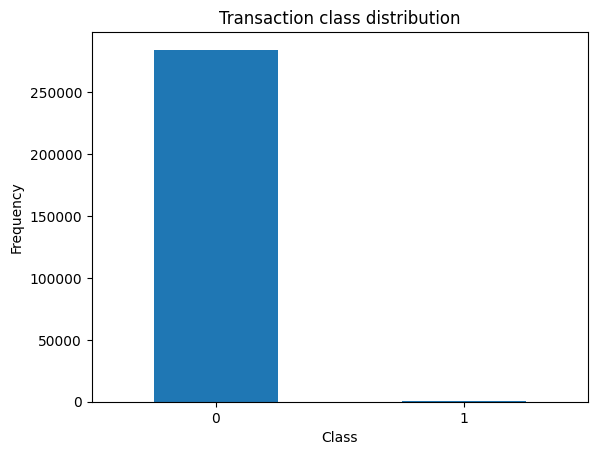

In [8]:
count_classes = pd.value_counts(df_fraud['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [9]:
data_vars = df_fraud.drop(columns=['Time', 'Amount', 'Class'], axis=1)

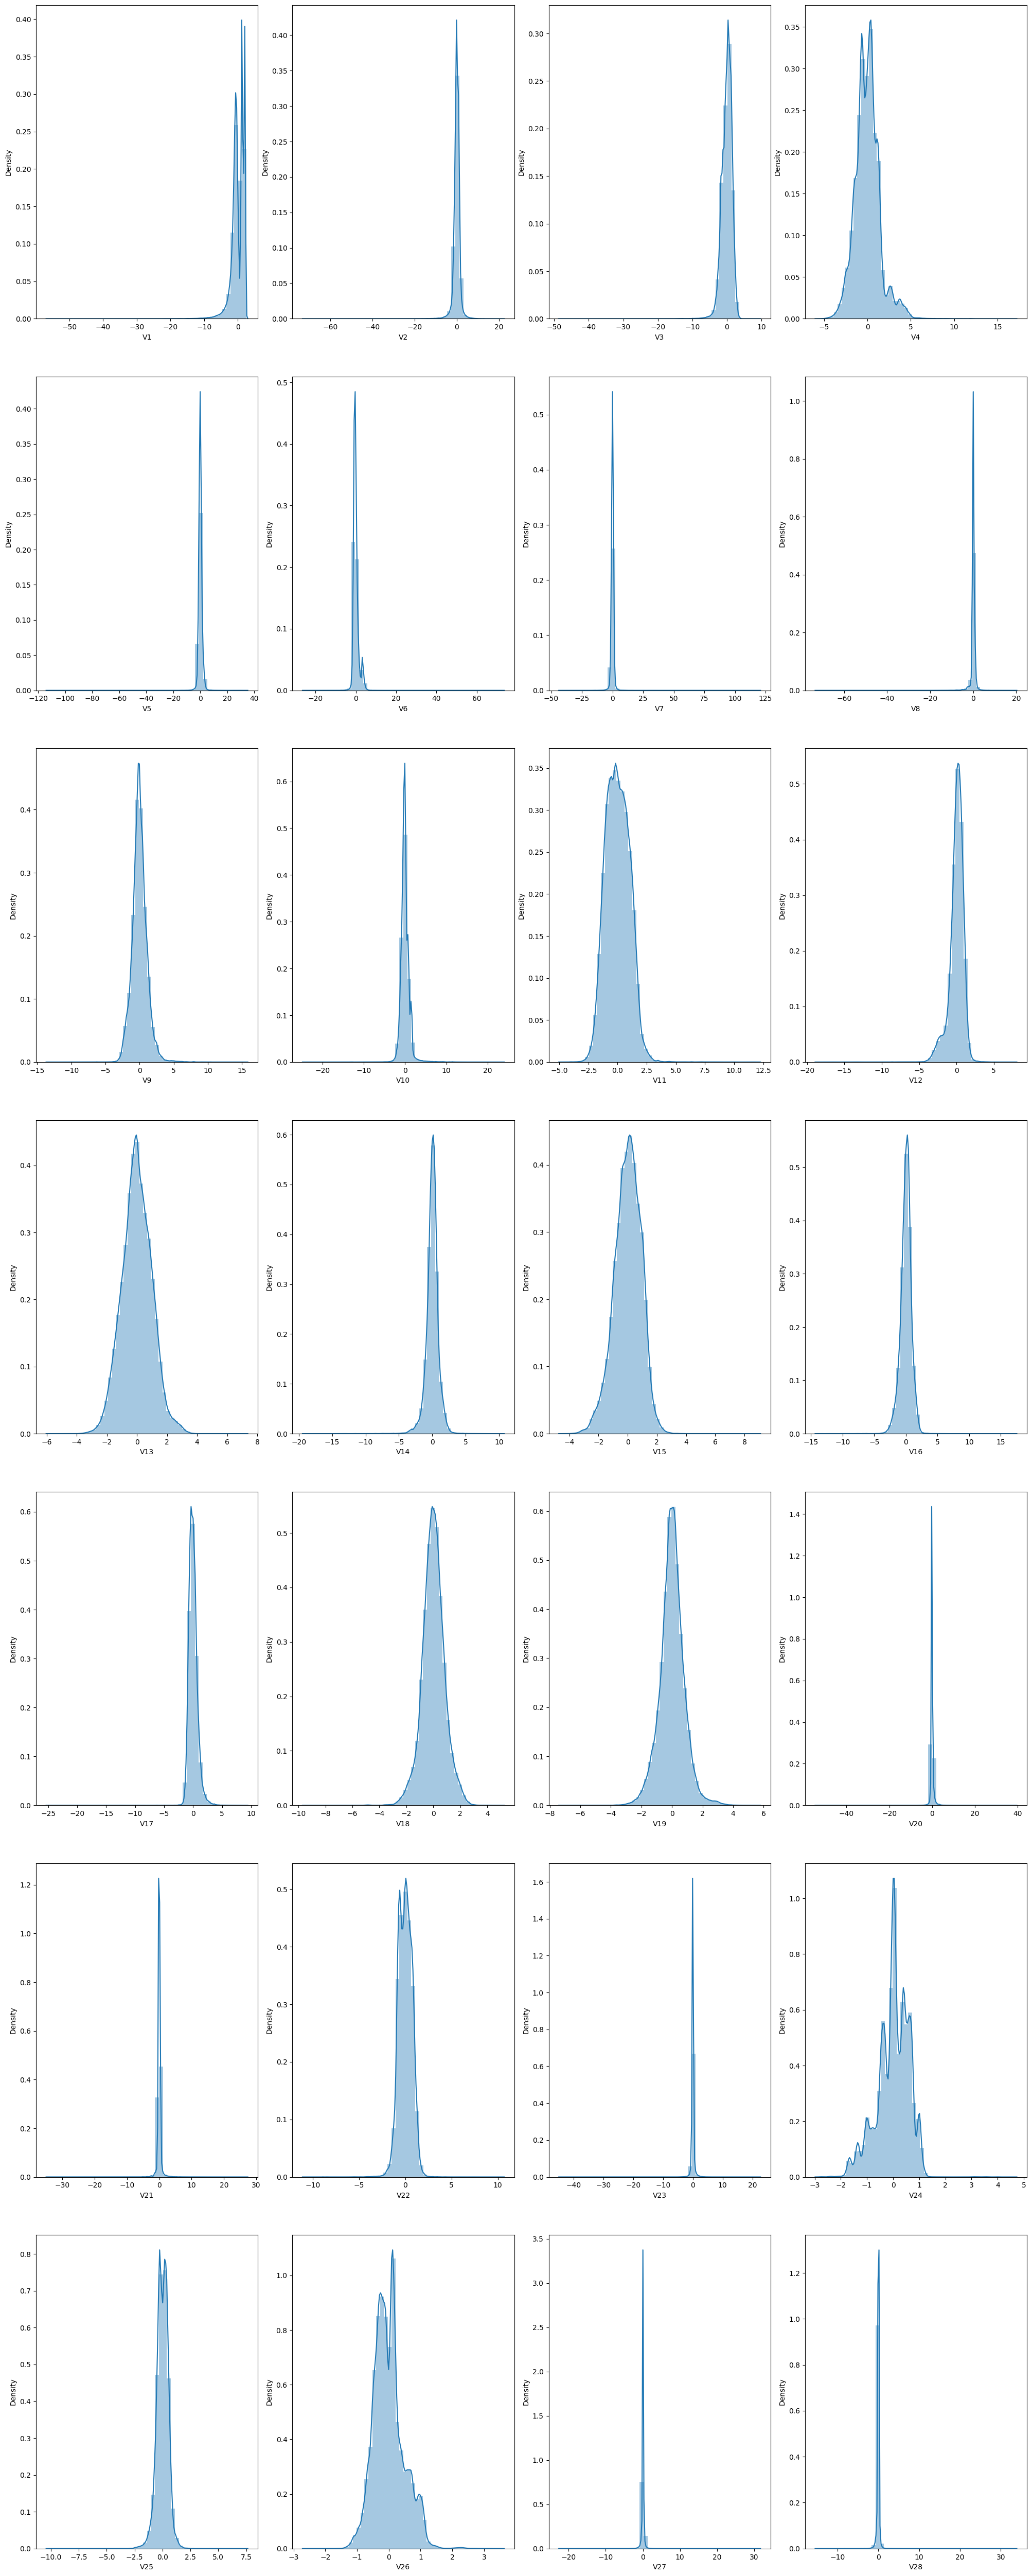

In [10]:
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in data_vars.columns:
    sns.distplot(data_vars[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Amount', ylabel='Density'>

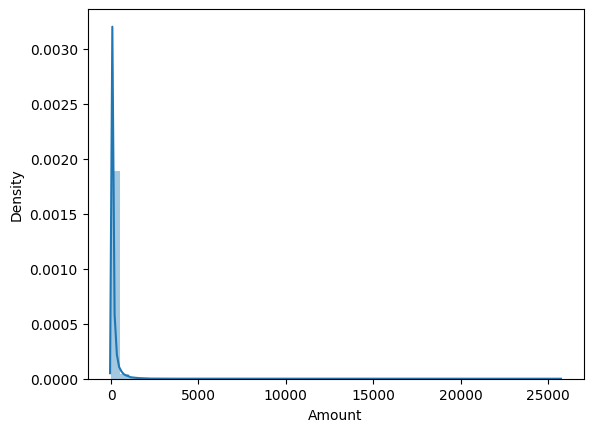

In [12]:
sns.distplot(df_fraud['Amount'])

<Axes: >

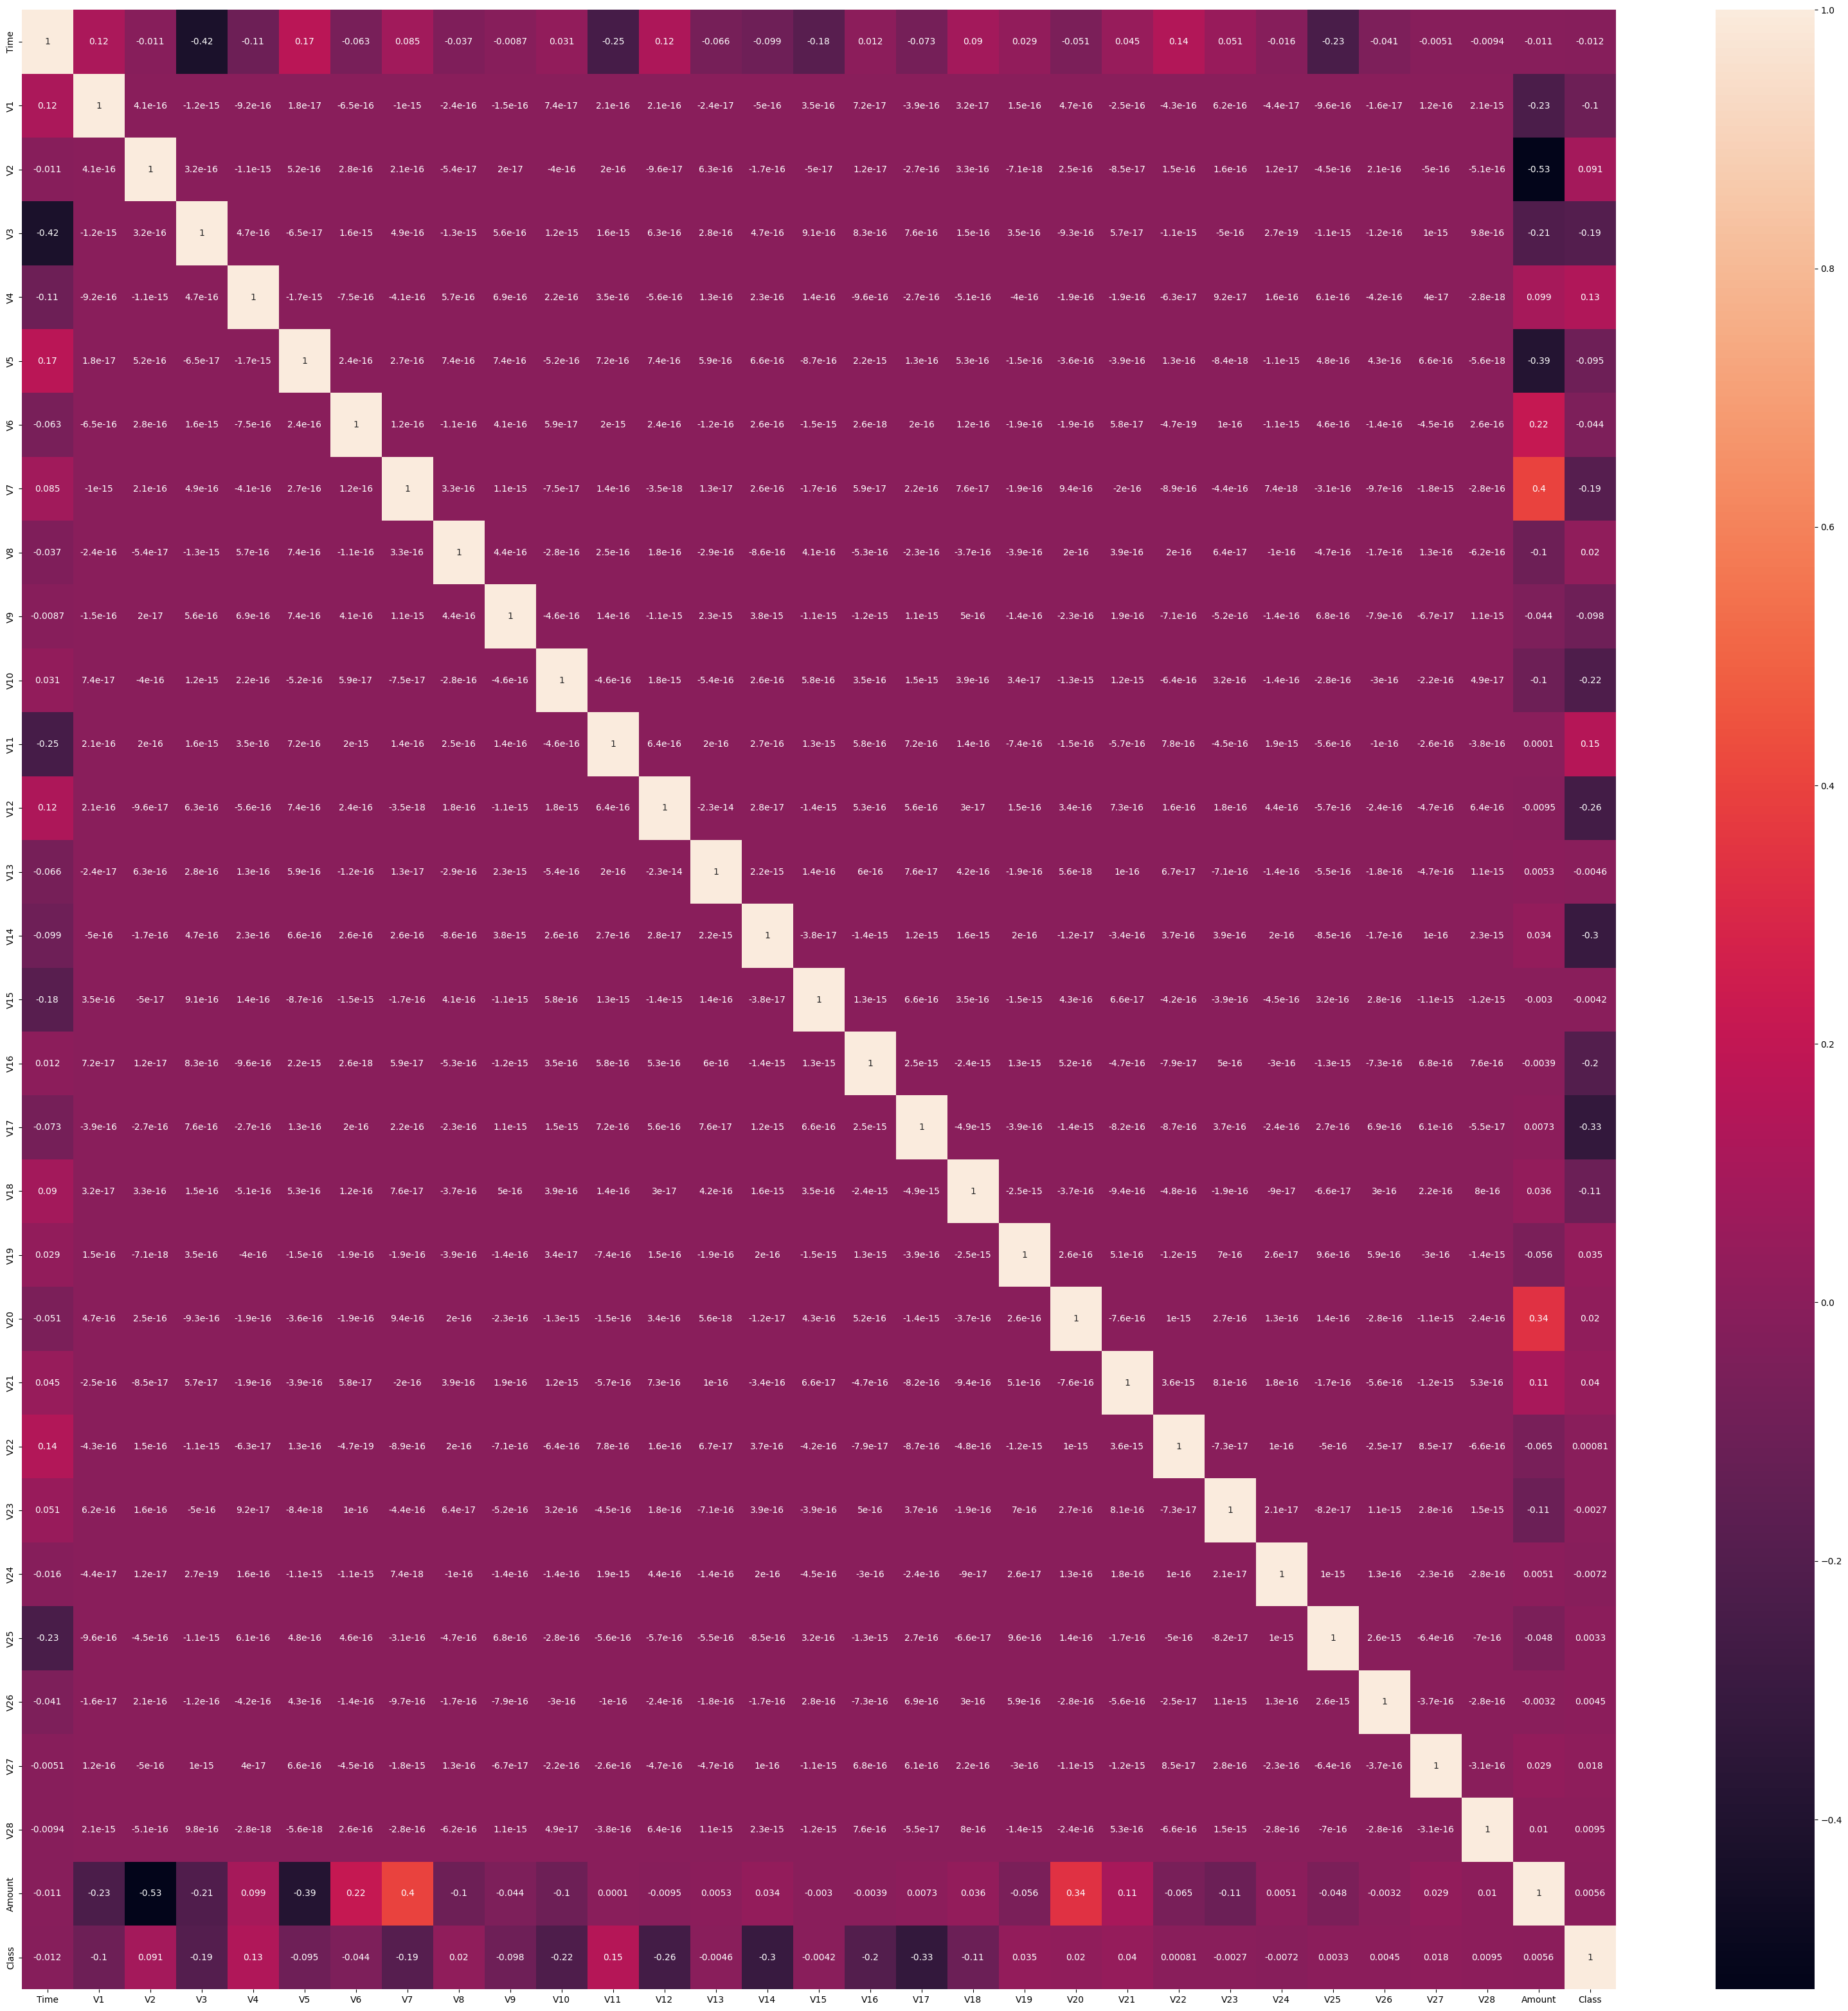

In [14]:
cor_df = df_fraud.corr()
plt.figure(figsize=(40,40))
sns.heatmap(cor_df, annot=True)


In [16]:
legit=df_fraud[df_fraud.Class == 0]
fraud=df_fraud[df_fraud.Class == 1]

In [17]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
df_fraud.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
## Alternate Way of Scaling
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)"""

#Traning

"""from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)
"""

'from sklearn.model_selection import train_test_split\nfrom sklearn.metrics import classification_report, f1_score\nx_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)\n'

In [22]:
##SMOTE incase of class imbalancement 
"""from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)"""

'from imblearn.over_sampling import SMOTE\nover_sample = SMOTE()\nx_smote, y_smote = over_sample.fit_resample(x_train, y_train)'

## Target Variable is the 'Class'

In [5]:
y = df_fraud['Class']

In [6]:
y.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

0    284315
1       492
Name: Class, dtype: int64

## Train and Test data split 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200)

## Data scaling 

In [8]:
scaler = RobustScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Decision Tree Model

In [9]:
dec_tree_model = tree.DecisionTreeClassifier()
dec_tree_model = dec_tree_model.fit(X_train_scaled, y_train)
dec_tree_predictions = dec_tree_model.predict(X_test_scaled)

## Confusion Matrix - Evaluate Decision Tree

Decision Tree Confusion Matrix


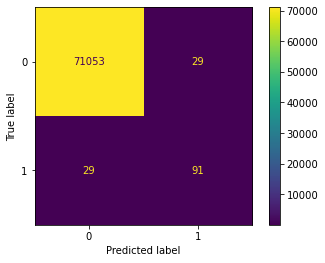

In [10]:
dec_tree_cm = confusion_matrix(y_test, dec_tree_predictions)

print("Decision Tree Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=dec_tree_cm, display_labels=dec_tree_model.classes_)
disp.plot()

In [11]:
# Calculate the accuracy score and AUC
dt_acc_score = accuracy_score(y_test, dt_predictions)
dt_auc = roc_auc_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

# Print the metrics
print(f"Decision Tree Accuracy Score : {dt_acc_score}")
print(f"Decision Tree AUC : {dt_auc}")
print(f"Decision Tree F1 Score: {dt_f1}")
print("Decision Tree Classification Report")
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy Score : 0.9991854161399961
Decision Tree AUC : 0.8789626769083593
Decision Tree F1 Score: 0.7583333333333333
Decision Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.76      0.76      0.76       120

    accuracy                           1.00     71202
   macro avg       0.88      0.88      0.88     71202
weighted avg       1.00      1.00      1.00     71202



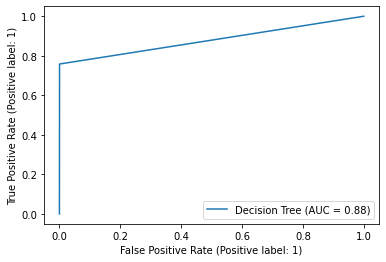

In [13]:
# Plot decision tree ROC with AUC value shown
RocCurveDisplay.from_predictions(y_test, dt_predictions, name='Decision Tree')
plt.show()

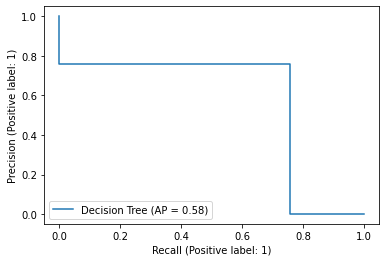

In [14]:
# Plot decision tree precision-recall curve
PrecisionRecallDisplay.from_predictions(y_test, dt_predictions, name='Decision Tree')
plt.show()

In [ ]:
dot_data = tree.export_graphviz(
    dt_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

## Gradient Boosting Model

In [18]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=3,
        random_state=0
    )

    model.fit(X_train_scaled, y_train.ravel())

In [21]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_features=2,
    max_depth=3,
    random_state=0
)


gb_model.fit(X_train_scaled, y_train.ravel())

gb_predictions = gb_model.predict(X_test_scaled)

In [ ]:

gb_cm = confusion_matrix(y_test, gb_predictions)

print("Gradient Boosting Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=gb_model.classes_)
disp.plot()

In [23]:
# Calculate the gradient boosting accuracy score and AUC
gb_acc_score = accuracy_score(y_test, gb_predictions)
gb_auc = roc_auc_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

# Print the metrics
print(f"Gradient Boosting Accuracy Score : {gb_acc_score}")
print(f"Gradient Boosting AUC : {gb_auc}")
print(f"Gradient Boosting F1 Score: {gb_f1}")
print("Gradient Boosting Classification Report")
print(classification_report(y_test, gb_predictions))

Gradient Boosting Accuracy Score : 0.9988343024072357
Gradient Boosting AUC : 0.8080730705382516
Gradient Boosting F1 Score: 0.6406926406926408
Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.67      0.62      0.64       120

    accuracy                           1.00     71202
   macro avg       0.83      0.81      0.82     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# Print imbalanced classification report
print(classification_report_imbalanced(y_test, gb_predictions))

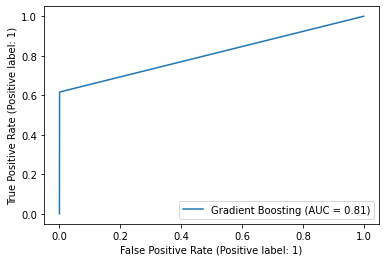

In [24]:
# Plot Gradient Boosting ROC with AUC value shown
RocCurveDisplay.from_predictions(y_test, gb_predictions, name='Gradient Boosting')
plt.show()

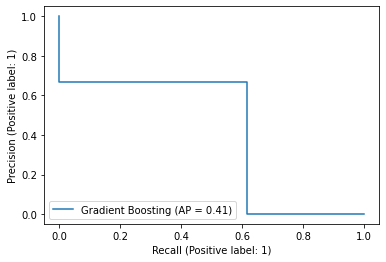

In [25]:
# Plot gradient boosting precision-recall curve
PrecisionRecallDisplay.from_predictions(y_test, gb_predictions, name='Gradient Boosting')
plt.show()

## Random Forest Model

In [26]:
# Create a random forest model, fit the model, and make predictions
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

In [27]:
# Create the random forest model instance, fit the model, and make predictions
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

Randome Foest Confusion Matrix


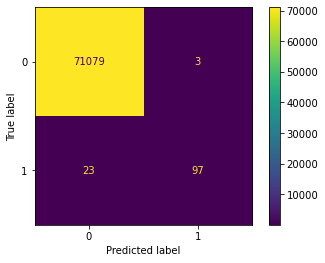

In [28]:
# Evaluate the random forest model using the confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

# Display confusion matrix
print("Randome Foest Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
disp.plot()

In [29]:
# Calculate the random foreast accuracy score and AUC
rf_acc_score = accuracy_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Print the metrics
print(f"Random Forest Accuracy Score : {rf_acc_score}")
print(f"Random Forest AUC : {rf_auc}")
print(f"Random Forest F1 Score: {rf_f1}")
print("Random Forest Classification Report")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy Score : 0.9996348417179293
Random Forest AUC : 0.9041455642778764
Random Forest F1 Score: 0.8818181818181818
Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.97      0.81      0.88       120

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



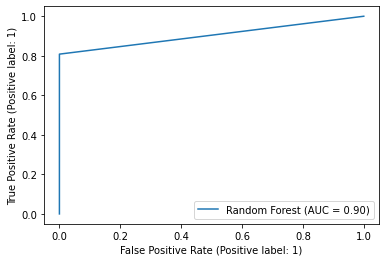

In [30]:
# Plot random forest ROC with AUC value shown
RocCurveDisplay.from_predictions(y_test, rf_predictions, name='Random Forest')
plt.show()

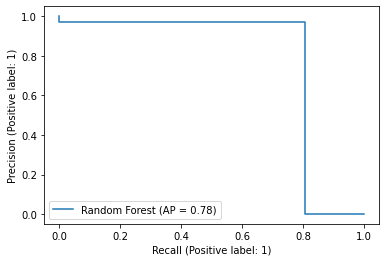

In [31]:
# Plot random forest precision-recall curve
PrecisionRecallDisplay.from_predictions(y_test, rf_predictions, name='Random Forest')
plt.show()

In [32]:
# Fetch the freatures importance and display the top 10 most important features
importances = rf_model.feature_importances_
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.15961083504686005, 'V17'),
 (0.12426437703262859, 'V12'),
 (0.11948368609883558, 'V14'),
 (0.07619094860474489, 'V11'),
 (0.07133697767200792, 'V16'),
 (0.07106983945109997, 'V10'),
 (0.0346333085433036, 'V9'),
 (0.028530294261846237, 'V18'),
 (0.028099408007603528, 'V4'),
 (0.02788479984673575, 'V7')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

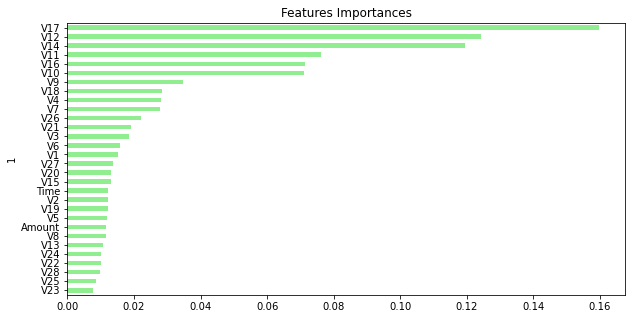

In [33]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize=(10,5))


## Bagging Classifier Model

In [34]:
# Create the bagging classifier model instance, fit the model, and make predictions
bag_model = BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=1)
bag_model = bag_model.fit(X_train_scaled, y_train)
bag_predictions = bag_model.predict(X_test_scaled)

Bagging Classifier Confusion Matrix


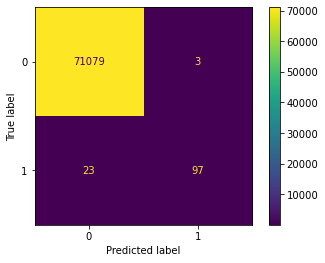

In [35]:
# Evaluate the bagging classifier model using the confusion matrix
bag_cm = confusion_matrix(y_test, rf_predictions)

# Display confusion matrix
print("Bagging Classifier Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=bag_cm, display_labels=bag_model.classes_)
disp.plot()

In [36]:
# Calculate the bagging classifier accuracy score and AUC
bag_acc_score = accuracy_score(y_test, bag_predictions)
bag_auc = roc_auc_score(y_test, bag_predictions)
bag_f1 = f1_score(y_test, bag_predictions)

# Print the metrics
print(f"Bagging Classifier Accuracy Score : {bag_acc_score}")
print(f"Bagging Classifier AUC : {bag_auc}")
print(f"Bagging Classifier F1 Score: {bag_f1}")
print("Bagging Classifier Classification Report")
print(classification_report(y_test, bag_predictions))

Bagging Classifier Accuracy Score : 0.9993820398303418
Bagging Classifier AUC : 0.8291455642778763
Bagging Classifier F1 Score: 0.7821782178217823
Bagging Classifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.96      0.66      0.78       120

    accuracy                           1.00     71202
   macro avg       0.98      0.83      0.89     71202
weighted avg       1.00      1.00      1.00     71202



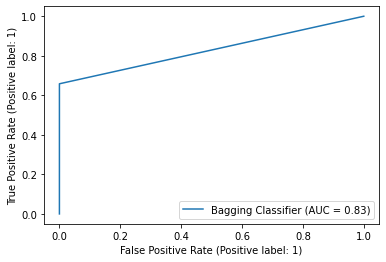

In [37]:
# Plot bagging classifier ROC with AUC value shown
RocCurveDisplay.from_predictions(y_test, bag_predictions, name='Bagging Classifier')
plt.show()

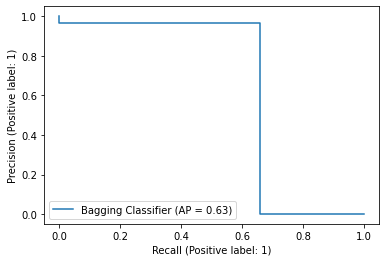

In [38]:
# Plot bagging classifier precision-recall curve
PrecisionRecallDisplay.from_predictions(y_test, bag_predictions, name='Bagging Classifier')
plt.show()

## XGBoost (Extreme Gradient Boosting) Model

In [39]:
# Create the XGBoost model instance, fit the model, and make predictions
xgb_model = XGBClassifier(max_depth=4, use_label_encoder=False)
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)

[23:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBoost Confusion Matrix


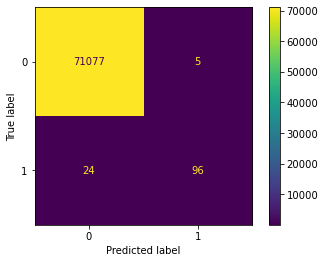

In [40]:
# Evaluate the XGBoost model using the confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_predictions)

# Display confusion matrix
print("XGBoost Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_model.classes_)
disp.plot()

In [41]:
# Calculate the XGBoost accuracy score and AUC
xgb_acc_score = accuracy_score(y_test, xgb_predictions)
xgb_auc = roc_auc_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

# Print the metrics
print(f"XGBoost Accuracy Score : {xgb_acc_score}")
print(f"XGBoost AUC : {xgb_auc}")
print(f"XGBost F1 Score: {xgb_f1}")
print("XGBoost Classification Report")
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy Score : 0.999592708069998
XGBoost AUC : 0.8999648293520159
XGBost F1 Score: 0.8687782805429864
XGBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.95      0.80      0.87       120

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



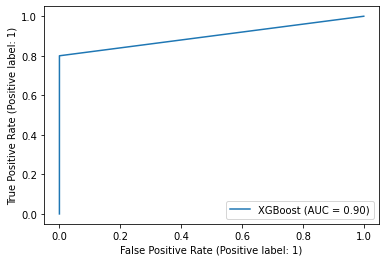

In [42]:
# Plot XGBoost ROC with AUC value shown
RocCurveDisplay.from_predictions(y_test, xgb_predictions, name='XGBoost')
plt.show()

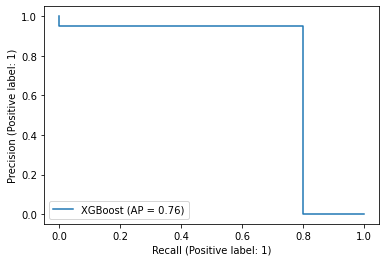

In [43]:
# Plot XGBoost precision-recall curve
PrecisionRecallDisplay.from_predictions(y_test, xgb_predictions, name='XGBoost')
plt.show()